# Cuentas Falsas y Bots Usados Con Fines Políticos

## Reporte Inicial

## Recolección de tweets basada en cuentas (@) y Hashtags (#)

Usando el API de Twitter recoletamos **tweets publicados entre el 27 de Noviembre y el 4 de Diciembre de 2017**, que provengan de cuentas de pre-candidatos de los principales partidos políticos (ANR y PLRA), y/o contengan hashtags utilizados con fines electorales. Como base utilizamos las cuentas y hashtags publicados por el Diario Última Hora en su artículo [Perfiles de pre-candidatos según las redes](http://elecciones.ultimahora.com/informacion/?id=20). Por ejemplo, Última Hora reporta que el hashtag **#JuntosPodemosMas** es utilizado para identificar tweets vínculados al candidatos Santiago Peña de Honor Colorado. Así mismo, **#MaritoDeLaGente** se utilzan en tweets publicados en favor del candidato del movimiento Colorado Añeteté. Según Última Hora, el hashtag **#EsAhora** aparece en los tweets relacionados al pre-candidato a la presidencia por el PLRA, Efraín Alegre.

[Aquí](https://docs.google.com/spreadsheets/d/e/2PACX-1vQHoukfR9AFhSaz30QHYwKqpwexe1ASrW8ya25Fueh3jXcRPMSjrAyj4SbzryTLiuKkPdi6fsprqtM2/pubhtml) se puede acceder a lista completa de hashtags y cuentas.

## Tamaño del data set

In [1]:
%matplotlib inline

# Importing libraries
from db_manager import *
import csv
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.style.use('seaborn')

In [2]:
db = get_db()
print('Se han recolectado {0} tweets y luego almacenados en una base de datos NoSQL (MongoDB) para facilitar su '\
      'análisis'.format(db.tweets.count()))

Se han recolectado 14640 tweets y luego almacenados en una base de datos NoSQL (MongoDB) para facilitar su análisis


## Cantidad de Tweets por Interna

### ANR

In [3]:
tweets_anr = do_search(db, {'partido_politico': 'anr'})
print('Tweets relacionados a la interna ANR: {0}'.format(tweets_anr.count()))

Tweets relacionados a la interna ANR: 10987


### PLRA

In [4]:
tweets_plra = do_search(db, {'partido_politico': 'plra'})
print('Tweets relacionados a la interna PLRA: {0}'.format(tweets_plra.count()))

Tweets relacionados a la interna PLRA: 1959


Casi el 80% de los tweets colectados provienen de cuentas vinculadas a candidatos de la ANR y/o utilizan hashtags asociados a campañas del Partido Colorado.

## Internas: ANR

En un primer momento nos enfocaremos en los tweets relacionados a la internas de la ANR por ser mayoría en el data set. Exploraremos inicialmente la distribución de tweets considerando los dos movimiento más importantes en estas internas, es decir **Honor Colorado** y **Colorado Añeteté**.

## Distribución de tweets por movimiento

### Honor Colorado

In [5]:
tweets_hc = do_search(db, {'movimiento': 'honor colorado'})
print('Se publication {0} tweets relacionados al movimiento Honor Colorado ({1}% del total)'.format(tweets_hc.count(), round((tweets_hc.count()/tweets_anr.count())*100,2)))

Se publication 5950 tweets relacionados al movimiento Honor Colorado (54.15% del total)


### Colorado Añetete

In [6]:
tweets_ca = do_search(db, {'movimiento': 'colorado añetete'})
print('Se publication {0} tweets relacionados al movimiento Colorado Añeteté ({1}% del total)'.
      format(tweets_ca.count(), round((tweets_ca.count()/tweets_anr.count())*100,2)))

Se publication 4545 tweets relacionados al movimiento Colorado Añeteté (41.37% del total)


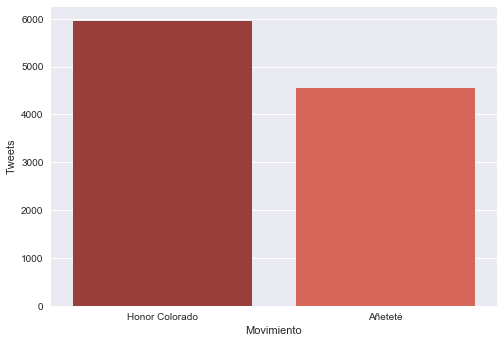

In [7]:
tweets_por_movimiento = pd.DataFrame({
    'Movimiento': ['Honor Colorado', 'Añeteté'],
    'Tweets': [tweets_hc.count(), tweets_ca.count()]
}, index=['hc', 'ca'])
sns.barplot(x='Movimiento', y='Tweets', data=tweets_por_movimiento, palette="Reds_d")

Los tweets relacionados al movimiento *Honor Colorado* constituyen el 55% de nuestro data set mientras que los vinculados a las candidaturas del movimiento *Colorado Añeteté* representan el 41% del total de datos. El restante porcentaje pertence a tweets vínculados a las internas de la ANR pero no necesariamente a uno de estos dos movimiento, por ejemplo, tweets que utilizan solamente el hashtag **#InternasANR**.

## Distribución de tweets por candidato

Para este análisis solo se tuvieron en cuenta los tweets que contienen hashtags orientadas principalmente a promocionar la figura del candidato no el movimiento o partido al que pertenece. Por ejemplo, los hashtags **#JuntosPodemosMas** o **#CaminandoJuntos** son hashtags vinculados principalmente a la figura de Santiago Peña no así el hashtag **#HonorColorado** que se utiliza para promocionar el movimiento partidario pero no necesariamente la candidatura de Peña. Aquí consideramos solo los primeros, es decir, aquellos vinculados directamente al candidato.

* Hashtags relacionados directamente con la campaña de Peña y que se consideraron para este análisis: #CaminandoJuntos, #JuntosHagamosMas, #SigamosConversando

* Hashtags relacionados directamente con la campaña de Abdo y que se consideraron para este análisis: #MaritoDeLaGente, #ParaguayDeLaGente

### Santiago Peña

In [8]:
tweets_sp = do_search(db, {'candidatura': 'santiago peña'})
print('Tweets relacionados al candidato Santiago Peña: ' \
      '{0} ({1}% del total del movimiento HC)'.format(tweets_sp.count(), 
                                                      round((tweets_sp.count()/tweets_hc.count())*100,2)))

Tweets relacionados al candidato Santiago Peña: 3570 (60.0% del total del movimiento HC)


### Mario Abdo Benítez

In [9]:
tweets_ma = do_search(db, {'candidatura': 'mario abdo'})
print('Tweets relacionados al candidato Mario Abdo: ' \
      '{0} ({1}% del total del movimiento Colorado Añeteté)'.format(tweets_ma.count(), 
                                                      round((tweets_ma.count()/tweets_ca.count())*100,2)))

Tweets relacionados al candidato Mario Abdo: 4054 (89.2% del total del movimiento Colorado Añeteté)


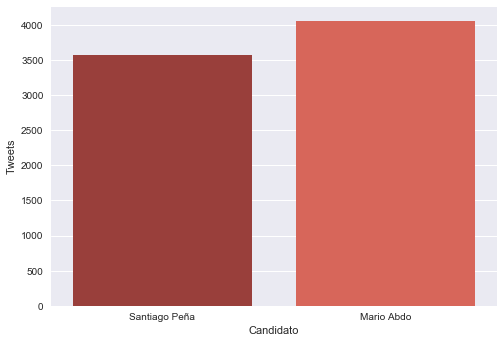

In [10]:
tweets_por_candidato = pd.DataFrame({
    'Candidato': ['Santiago Peña', 'Mario Abdo'],
    'Tweets': [tweets_sp.count(), tweets_ma.count()]
}, index=['sp', 'ma'])
sns.barplot(x='Candidato', y='Tweets', data=tweets_por_candidato, palette="Reds_d")

Este resultado es interesante. Muestra una diferencia de enfoques en las campañas en redes de ambos movimientos. **La campaña del movimiento *Colorado Añeteté* se centra principalmente en el candidato a presidente Mario Abdo Benítez, casi el 90% de los tweets éstan vinculados a su figura**. Por otra parte, la campañan de *Honor Colorado* se enfoca más en el  movimiento en si y no tanto en Peña. Quizás el pasado liberal del candidato oficialista puede estar influenciando la estraegia de HC.

## Hashtags más populares usados por los movimientos

### Honor Colorado

In [11]:
hashtags_hc = get_hashtags_by_movement(db, 'honor colorado')
hashtags_populares_hc = []
for hashtag in hashtags_hc:
    por_total = round((hashtag['count']/tweets_hc.count())*100)
    hashtag_dict = {'1. Hashtag': '#' + hashtag['_id'], '2. Cantidad de Tweets': hashtag['count'], 
                    '3. % Total de HC': str(por_total) + '%'}
    hashtags_populares_hc.append(hashtag_dict)
pd.DataFrame(hashtags_populares_hc)

,1. Hashtag,2. Cantidad de Tweets,3. % Total de HC
0,#JuntosPodemosMas,1152,19%
1,#HonorColorado,819,14%
2,#SigamosConversando,406,7%
3,#CaminandoJuntos,272,5%


### Colorado Añeteté

In [12]:
hashtags_ca = get_hashtags_by_movement(db, 'colorado añetete')
hashtags_populares_ca = []
for hashtag in hashtags_ca:
    por_total = round((hashtag['count']/tweets_hc.count())*100)
    hashtag_dict = {'1. Hashtag': '#' + hashtag['_id'], '2. Cantidad de Tweets': hashtag['count'], 
                    '3. % Total de Añeteté': str(por_total) + '%'}
    hashtags_populares_ca.append(hashtag_dict)
pd.DataFrame(hashtags_populares_ca)

,1. Hashtag,2. Cantidad de Tweets,3. % Total de Añeteté
0,#ParaguayDeLaGente,1612,27%
1,#MaritoDeLaGente,1291,22%
2,#Lista3,1151,19%
3,#ColoradoAñetete,321,5%


Estos resultados son consistentes con los anteriores ya que muestran como **la campaña del movimiento HC está principalmente enfocada en dar promoción al movimiento antes que al candidato**.

## Cantidad de tuiteros por movimiento

### Honor Colorado

In [13]:
unique_users_hc = get_unique_users_by_movement(db, 'honor colorado')
print('{0} usuarios tuitearon sobre Honor Colorado'.format(len(unique_users_hc)))

2260 usuarios tuitearon sobre Honor Colorado


#### Top-10 más activos con sus actividades

In [14]:
top10_tuiteros_hc = []
for i in range(10):
    tuitero_hc = {'1.Usuario': unique_users_hc[i]['screen_name'], 
                  '2.Tweets': unique_users_hc[i]['tweets_count'],
                  '3.Originales': unique_users_hc[i]['original_count'],
                  '4.Retweets': unique_users_hc[i]['retweets_count'],
                  '5.Quotes': unique_users_hc[i]['quotes_count'],
                  '6.Replies': unique_users_hc[i]['replies_count']}
    top10_tuiteros_hc.append(tuitero_hc)
pd.DataFrame(top10_tuiteros_hc)

,1.Usuario,2.Tweets,3.Originales,4.Retweets,5.Quotes,6.Replies
0,ArturoO22734057,55,0,55,0,0
1,Michelec1954,48,0,0,46,2
2,delgapy2016,46,0,46,0,0
3,silvatadeo2,42,0,40,0,2
4,miryangonza,41,0,39,0,2
5,saguierangel,40,0,39,0,1
6,alilebron45,40,0,39,0,1
7,JudithGimnez2,39,0,38,0,1
8,Mariade84654356,37,0,37,0,0
9,aristiqui85,36,0,34,0,2


### Colorado Añeteté

In [15]:
unique_users_ca = get_unique_users_by_movement(db, 'colorado añetete')
print('{0} usuarios tuitearon sobre Colorado Anetete'.format(len(unique_users_ca)))

842 usuarios tuitearon sobre Colorado Anetete


#### Top-10 más activos y sus actividades

In [16]:
top10_tuiteros_ca = []
for i in range(10):
    tuitero_ca = {'1.Usuario': unique_users_ca[i]['screen_name'], 
                  '2.Tweets': unique_users_ca[i]['tweets_count'],
                  '3.Originales': unique_users_ca[i]['original_count'],
                  '4.Retweets': unique_users_ca[i]['retweets_count'],
                  '5.Quotes': unique_users_ca[i]['quotes_count'],
                  '6.Replies': unique_users_ca[i]['replies_count']}
    top10_tuiteros_ca.append(tuitero_ca)
pd.DataFrame(top10_tuiteros_ca)

,1.Usuario,2.Tweets,3.Originales,4.Retweets,5.Quotes,6.Replies
0,Paraguaynosune,291,0,291,0,0
1,jjrios_bogado,108,0,92,0,16
2,Solmelga,97,0,65,0,32
3,MichellMCord,70,0,55,9,6
4,MaritoAbdo,70,0,11,0,59
5,Beatriz20D,66,0,66,0,0
6,felixugarte,62,0,62,0,0
7,LaJusticierra,62,0,59,0,3
8,EDITHVILLA3,55,0,54,0,1
9,equipo_anetete,52,0,46,0,6


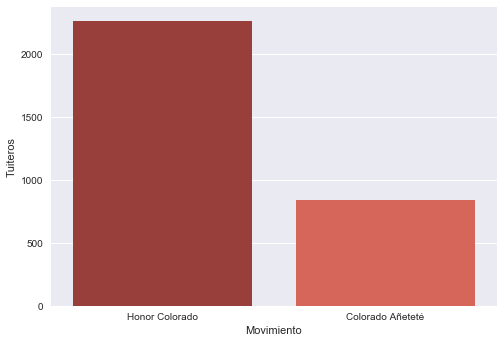

In [17]:
tuiteros_por_movimiento = pd.DataFrame({
    'Movimiento': ['Honor Colorado', 'Colorado Añeteté'],
    'Tuiteros': [len(unique_users_hc), len(unique_users_ca)]
}, index=['hc', 'ca'])
sns.barplot(x='Movimiento', y='Tuiteros', data=tuiteros_por_movimiento, palette="Reds_d")

Como se podría esperar el ejercito de tuiteros del movimiento *Honor Colorado* es ampliamente superior al de *Colorado Añeteté*. Prácticamente, **por cada tuitero de *Colorado Añeteté* existen 2.7 tuiteros de *Honor Colorado***. Sin embargo la diferencia en cantidad de tweets entre ambos movimiento no es muy importante, como vimos anteriormente, lo que demuestra que *Colorado Añeteté* tiene un ejercito más activo de tuiteros.

Otro aspecto destacable del último análisis es el tipo de actividad que realizan tanto los tuiteros de *Honor Colorado* como los de *Añeteté*. En ambos casos, **los tuiteros más activos no publican nuevo tweets** sino se limitan a casi exclusivamente a retuitear tweets vinculados a su movimiento. En otras palabras, la principal actividad de estos usuarios es amplificar y promocionar información relacionada a sus intereses. **Este comportamiento es típico de bots y cuentas falsas**. La siguiente tarea en el estudio consistirá, por lo tanto, en análizar más en detalle el comportamiento de estas cuentas con el objetivo de verificar si son falsas o se encuentran vínculadas a sistemas automáticos de publicaciones. 